In [1]:
# Packages for loading, cleaning, visualization, and analysis

from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the beer and brewery dataset
beer = pd.read_csv('/Users/bySUH/Desktop/MSDS/Spring18/DS6501/beers.csv')
brewery = pd.read_csv('/Users/bySUH/Desktop/MSDS/Spring18/DS6501/breweries.csv')


In [3]:
# rename columns
brewery.columns = ['brewery_id', 'name', 'city', 'state']

In [4]:
# merge two dataset by brewery_id
new_df = pd.merge(beer, brewery, on='brewery_id')
new_df.head() # just look at the first 5 rows

,Unnamed: 0,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [5]:
# rename name_x and name_y columns.
new_df.rename(columns={'name_x': 'beer_name', 'name_y': 'brewery_name'}, inplace=True)

# abv should be in percentages
new_df['abv'] = new_df['abv']*100

# drop columns that I will not use (unnamed: 0, id, brewery_id, brewery_name)
new_df = new_df.drop(['Unnamed: 0','id','brewery_id','brewery_name'], axis = 1)

new_df.head(50)


,abv,ibu,beer_name,style,ounces,city,state
0,5.0,NaN,Pub Beer,American Pale Lager,12.0,Bend,OR
1,6.6,NaN,Devil's Cup,American Pale Ale (APA),12.0,Gary,IN
2,7.1,NaN,Rise of the Phoenix,American IPA,12.0,Gary,IN
3,9.0,NaN,Sinister,American Double / Imperial IPA,12.0,Gary,IN
4,7.5,NaN,Sex and Candy,American IPA,12.0,Gary,IN
5,7.7,NaN,Black Exodus,Oatmeal Stout,12.0,Gary,IN
6,4.5,NaN,Lake Street Express,American Pale Ale (APA),12.0,Gary,IN
7,6.5,NaN,Foreman,American Porter,12.0,Gary,IN
8,5.5,NaN,Jade,American Pale Ale (APA),12.0,Gary,IN
9,8.6,NaN,Cone Crusher,American Double / Imperial IPA,12.0,Gary,IN


In [6]:
new_df.shape

(2410, 7)

In [7]:
# Check for missing values
new_df.isnull().sum()

abv            62
ibu          1005
beer_name       0
style           5
ounces          0
city            0
state           0
dtype: int64

In [8]:
# fill in abv and ibu missing values with its mean value by style

new_df['ibu'].fillna(new_df.groupby('style')['ibu'].transform('mean'), inplace=True)

new_df['abv'].fillna(new_df.groupby('style')['abv'].transform('mean'), inplace=True)

# round ibu
new_df['ibu'] = new_df['ibu'].apply(np.round)

new_df.head(50)

,abv,ibu,beer_name,style,ounces,city,state
0,5.0,27.0,Pub Beer,American Pale Lager,12.0,Bend,OR
1,6.6,45.0,Devil's Cup,American Pale Ale (APA),12.0,Gary,IN
2,7.1,68.0,Rise of the Phoenix,American IPA,12.0,Gary,IN
3,9.0,93.0,Sinister,American Double / Imperial IPA,12.0,Gary,IN
4,7.5,68.0,Sex and Candy,American IPA,12.0,Gary,IN
5,7.7,28.0,Black Exodus,Oatmeal Stout,12.0,Gary,IN
6,4.5,45.0,Lake Street Express,American Pale Ale (APA),12.0,Gary,IN
7,6.5,32.0,Foreman,American Porter,12.0,Gary,IN
8,5.5,45.0,Jade,American Pale Ale (APA),12.0,Gary,IN
9,8.6,93.0,Cone Crusher,American Double / Imperial IPA,12.0,Gary,IN


In [9]:
# Check again for missing values
new_df.isnull().sum()

# The ones that still have missing values are the ones that have no previous mean data when grouped by style.
# Thus, remove the rest of the missing values

abv           3
ibu          55
beer_name     0
style         5
ounces        0
city          0
state         0
dtype: int64

In [10]:
# drop the na values in the dataset
cleaned_df = new_df.dropna()

In [11]:
cleaned_df.head(10)


,abv,ibu,beer_name,style,ounces,city,state
0,5.0,27.0,Pub Beer,American Pale Lager,12.0,Bend,OR
1,6.6,45.0,Devil's Cup,American Pale Ale (APA),12.0,Gary,IN
2,7.1,68.0,Rise of the Phoenix,American IPA,12.0,Gary,IN
3,9.0,93.0,Sinister,American Double / Imperial IPA,12.0,Gary,IN
4,7.5,68.0,Sex and Candy,American IPA,12.0,Gary,IN
5,7.7,28.0,Black Exodus,Oatmeal Stout,12.0,Gary,IN
6,4.5,45.0,Lake Street Express,American Pale Ale (APA),12.0,Gary,IN
7,6.5,32.0,Foreman,American Porter,12.0,Gary,IN
8,5.5,45.0,Jade,American Pale Ale (APA),12.0,Gary,IN
9,8.6,93.0,Cone Crusher,American Double / Imperial IPA,12.0,Gary,IN


In [12]:
styles = (cleaned_df["style"].value_counts()[:10]).keys()
styles

Index(['American IPA', 'American Pale Ale (APA)', 'American Amber / Red Ale',
       'American Blonde Ale', 'American Double / Imperial IPA',
       'American Pale Wheat Ale', 'American Brown Ale', 'American Porter',
       'Saison / Farmhouse Ale', 'Witbier'],
      dtype='object')

In [13]:
# Check for column types
cleaned_df.dtypes

abv          float64
ibu          float64
beer_name     object
style         object
ounces       float64
city          object
state         object
dtype: object

In [14]:
cleaned_df.head(10)

,abv,ibu,beer_name,style,ounces,city,state
0,5.0,27.0,Pub Beer,American Pale Lager,12.0,Bend,OR
1,6.6,45.0,Devil's Cup,American Pale Ale (APA),12.0,Gary,IN
2,7.1,68.0,Rise of the Phoenix,American IPA,12.0,Gary,IN
3,9.0,93.0,Sinister,American Double / Imperial IPA,12.0,Gary,IN
4,7.5,68.0,Sex and Candy,American IPA,12.0,Gary,IN
5,7.7,28.0,Black Exodus,Oatmeal Stout,12.0,Gary,IN
6,4.5,45.0,Lake Street Express,American Pale Ale (APA),12.0,Gary,IN
7,6.5,32.0,Foreman,American Porter,12.0,Gary,IN
8,5.5,45.0,Jade,American Pale Ale (APA),12.0,Gary,IN
9,8.6,93.0,Cone Crusher,American Double / Imperial IPA,12.0,Gary,IN


In [15]:
# write out a csv file
path = "/Users/bySUH/Desktop/MSDS/Spring18/DS6501/"
file = "Beer_Clean.csv"
cleaned_df.to_csv(path + file, index= False)

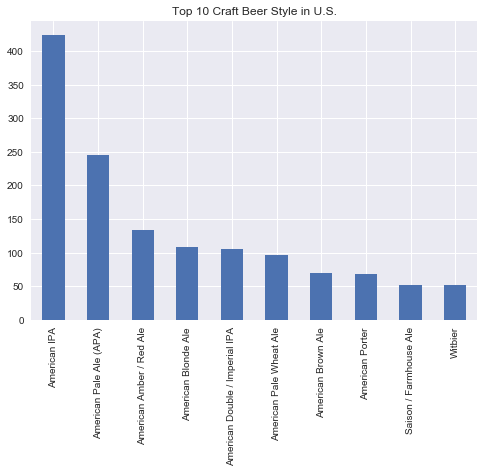

In [70]:
# Show top ten style of beers
top10 = (cleaned_df["style"].value_counts()[:10])
top10.plot(kind='bar', title = 'Top 10 Craft Beer Style in U.S.')
plt.show()



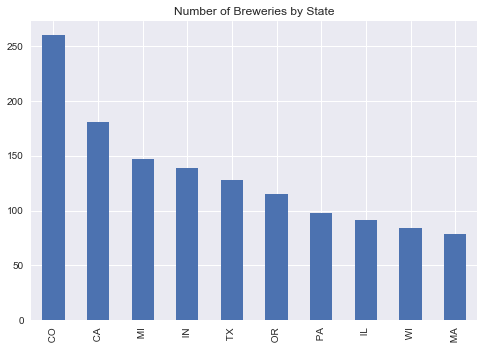

In [69]:
# Which state has the most breweries in the U.S?
state10 = cleaned_df.state.value_counts()[:10]
state10.plot(kind='bar', title='Number of Breweries by State')
plt.show()


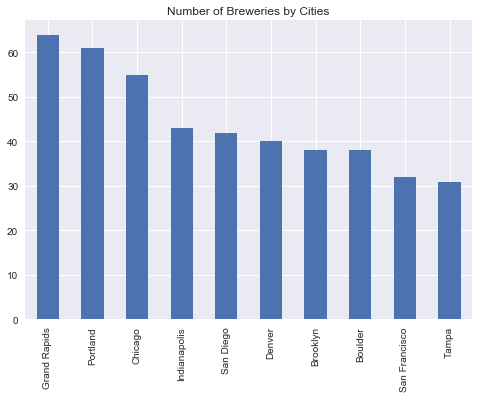

In [68]:
#Which city? (top 10)
city10 = cleaned_df.city.value_counts()[:10]
city10.plot(kind='bar', title='Number of Breweries by Cities')

plt.show()

In [141]:
cleaned_df["style"].value_counts()[:10]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

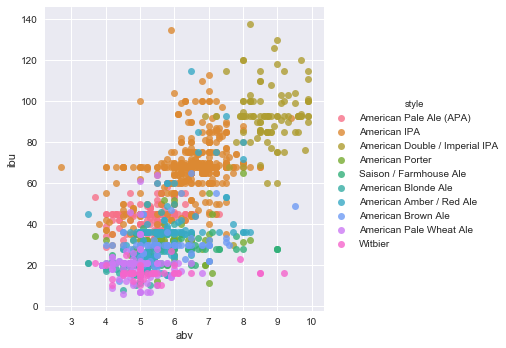

In [155]:
topstyles = ['American IPA', 'American Pale Ale (APA)', 'American Amber / Red Ale', 'American Blonde Ale', 'American Double / Imperial IPA', 'American Pale Wheat Ale', 'American Brown Ale', 'American Porter', 'Saison / Farmhouse Ale', 'Witbier']   
df = cleaned_df.loc[cleaned_df['style'].isin(topstyles)]


sns.lmplot(x='abv', y='ibu', data=df, hue='style', fit_reg=False)
plt.show()

In [150]:
sns.lmplot(data=df, x='abv', y='ibu', hue='style', fit_reg=False)

KeyError: "['abv' 'ibu' 'style'] not in index"

In [149]:
num = 20
x, y = np.random.random((2, num))
labels = np.random.choice(['a', 'b', 'c'], num)
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')


# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

,label,x,y
0,a,0.956502,0.174394
1,c,0.512884,0.216435
2,c,0.848951,0.212820
3,b,0.411375,0.282960
4,b,0.149280,0.072587
5,c,0.740754,0.435290
6,b,0.975732,0.842917
7,a,0.530363,0.318199
8,c,0.202199,0.591067
9,c,0.017266,0.546571


In [85]:
fig, axes = plt.subplots(4, 3, sharex = True, sharey = True, figsize=(10,10)) # One beer style by figure  
fig, global_ax = plt.subplots(figsize=(12,12)) # All beers styles in one figure.
x_max = cleaned_df["ibu"].max() # Get the max ibu value
y_max = cleaned_df["abv"].max() # Get the max abv value

for style, ax in zip(styles, axes.ravel()):
    ibu_data = cleaned_df["ibu"][cleaned_df["style"] == style].values
    abv_data = cleaned_df["abv"][cleaned_df["style"] == style].values
    
    ax.set_title(style)
    ax.plot(ibu_data, abv_data, marker = 'o', linestyle = '')
    ax.legend(numpoints=1, loc='lower right', fontsize = 10)

    global_ax.plot(ibu_data, abv_data, marker = 'o', label = style, linestyle = '')

global_ax.legend(numpoints=1, loc='lower right', fontsize = 10)

plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'ravel'